# Extreme Gradient Boosted Trees

XGBoost is the primary implementation of gradient boosted trees used in Python. Here, we train a classifier on the Hearts disease dataset to predict whether a give patient has heart disease based on 13 attributes.


## Loading in the Data
First, we import all the necessary libraries as well as the data.

In [169]:
pip install xgboost


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from xgboost import XGBClassifier, plot_importance
import xgboost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


In [171]:
%matplotlib inline

In [172]:
df = pd.read_csv('cardio_train1.csv')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [173]:
df.shape

(9999, 13)

We have 9999 observations, each with 13 attributes out of which are 12 are features and the last one is the result column.

In [174]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.00000,9999.000000
mean,7108.527853,19449.312331,1.345335,164.308331,74.304340,128.035804,97.954895,1.365037,1.222222,0.089009,0.053705,0.79718,0.503050
std,4127.675620,2479.751490,0.475501,8.179194,14.566945,116.841395,207.208304,0.677682,0.565585,0.284771,0.225447,0.40212,0.500016
min,0.000000,10878.000000,1.000000,70.000000,30.000000,-100.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,3529.500000,17629.500000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.00000,0.000000
50%,7079.000000,19699.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.00000,1.000000
75%,10693.500000,21314.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.00000,1.000000
max,14253.000000,23670.000000,2.000000,250.000000,200.000000,11500.000000,10000.000000,3.000000,3.000000,1.000000,1.000000,1.00000,1.000000


## Exploratory Data Analysis

This is a necessary step to gauge the quality of the data. First, we need to check the value counts in the target column to make sure they aren't skewed towards one result.


In [175]:
df.cardio.value_counts() 

cardio
1    5030
0    4969
Name: count, dtype: int64

<BarContainer object of 2 artists>

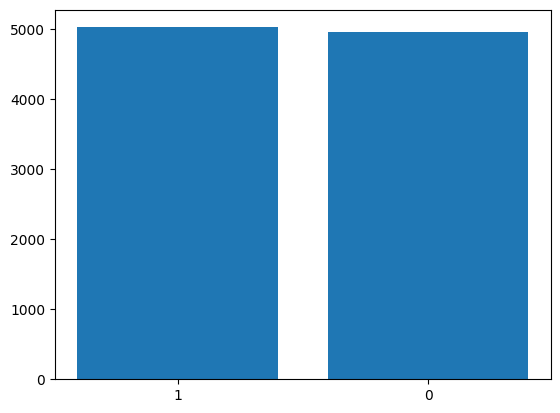

In [176]:
plt.bar(['1','0'], height=df.cardio.value_counts())

# DATA PREPROCESSING 

Checking for missing values , if any

In [177]:
missing_values = df.isnull().sum()


#### Creating a heatmap to visualize missing values

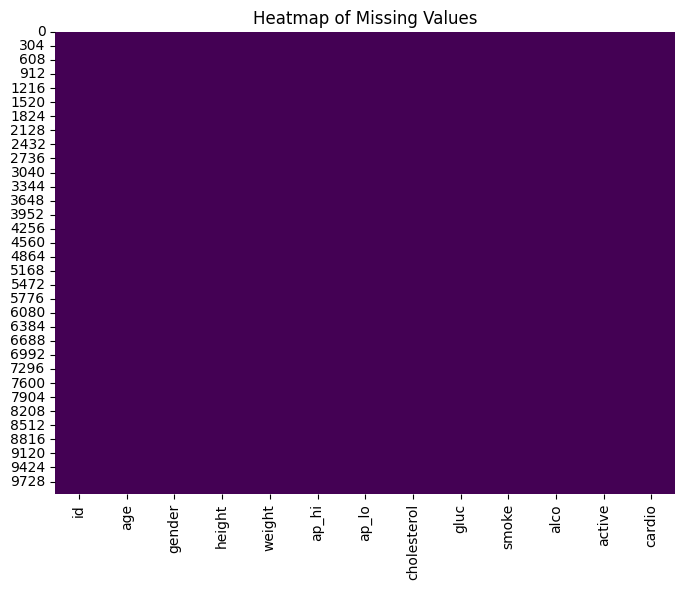

In [178]:
plt.figure(figsize=(8, 6))  # Set the figure size for better visibility
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')  # Customize the colormap if needed
plt.title('Heatmap of Missing Values')
plt.show()

There are no missing values.

### Metrics 'height', 'weight', 'age','ap_hi', 'ap_lo' undergoing normalization

In [179]:
scaler = MinMaxScaler()
df[['height', 'weight', 'age','ap_hi','ap_lo']] = scaler.fit_transform(df[['height', 'weight', 'age','ap_hi','ap_lo']])


C:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


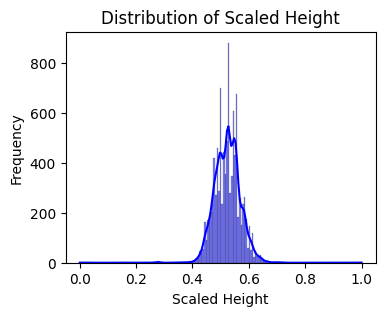

C:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


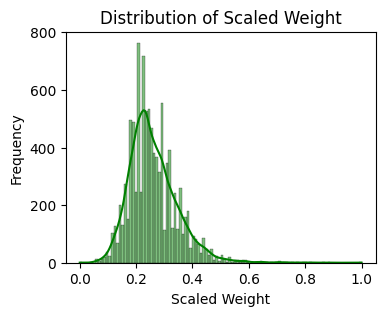

C:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


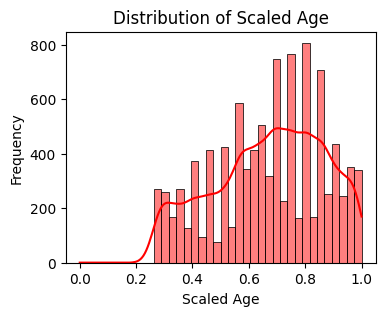

In [180]:
plt.figure(figsize=(4, 3))
sns.histplot(df['height'], kde=True, color='blue')
plt.title('Distribution of Scaled Height')
plt.xlabel('Scaled Height')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(4, 3))
sns.histplot(df['weight'], kde=True, color='green')
plt.title('Distribution of Scaled Weight')
plt.xlabel('Scaled Weight')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(4, 3))
sns.histplot(df['age'], kde=True, color='red')
plt.title('Distribution of Scaled Age')
plt.xlabel('Scaled Age')
plt.ylabel('Frequency')
plt.show()


C:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


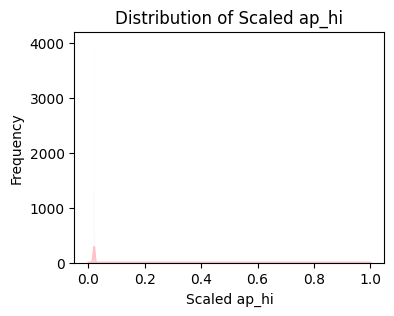

C:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


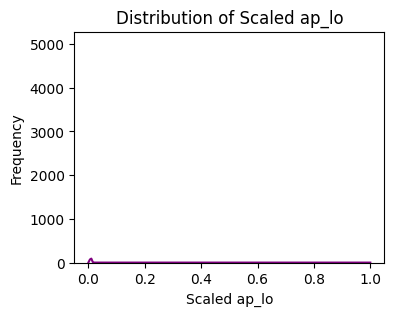

In [181]:
plt.figure(figsize=(4, 3))
sns.histplot(df['ap_hi'], kde=True, color='pink')
plt.title('Distribution of Scaled ap_hi')
plt.xlabel('Scaled ap_hi')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(4, 3))
sns.histplot(df['ap_lo'], kde=True, color='purple')
plt.title('Distribution of Scaled ap_lo')
plt.xlabel('Scaled ap_lo')
plt.ylabel('Frequency')
plt.show()

### Outlier Removal for Height, Weight and Age

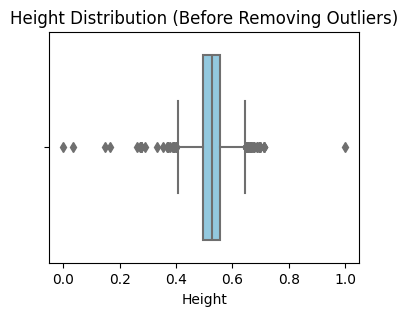

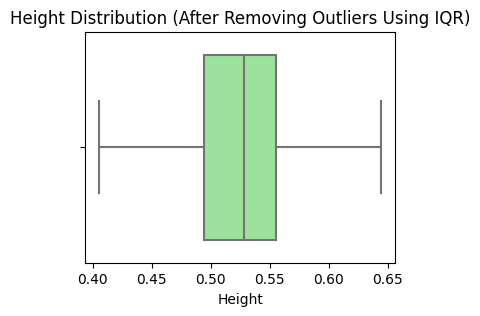

In [182]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Plot Height Distribution Before Removing Outliers
plt.figure(figsize=(4, 3))
sns.boxplot(x=df['height'], color='skyblue')
plt.title('Height Distribution (Before Removing Outliers)')
plt.xlabel('Height')
plt.show()

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['height'].quantile(0.25)
Q3 = df['height'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers based on the IQR method
df_filtered_height_iqr = df[(df['height'] >= lower_bound) & (df['height'] <= upper_bound)]

# Plot Height Distribution After Removing Outliers Using IQR
plt.figure(figsize=(4, 3))
sns.boxplot(x=df_filtered_height_iqr['height'], color='lightgreen')
plt.title('Height Distribution (After Removing Outliers Using IQR)')
plt.xlabel('Height')
plt.show()



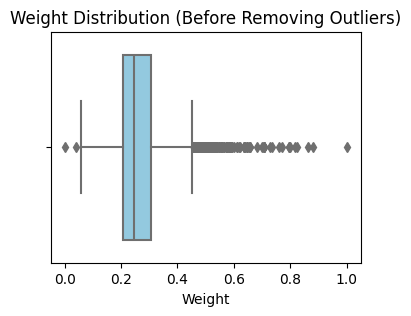

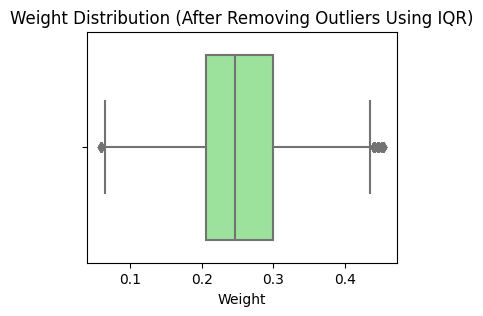

In [183]:

import seaborn as sns
import matplotlib.pyplot as plt

# Plot Weight Distribution Before Removing Outliers
plt.figure(figsize=(4, 3))
sns.boxplot(x=df['weight'], color='skyblue')
plt.title('Weight Distribution (Before Removing Outliers)')
plt.xlabel('Weight')
plt.show()

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for Weight
Q1_weight = df['weight'].quantile(0.25)
Q3_weight = df['weight'].quantile(0.75)

# Calculate IQR (Interquartile Range) for Weight
IQR_weight = Q3_weight - Q1_weight

# Define lower and upper bounds for outliers in Weight data
lower_bound_weight = Q1_weight - 1.5 * IQR_weight
upper_bound_weight = Q3_weight + 1.5 * IQR_weight

# Filter out the outliers based on the IQR method for Weight
df_filtered_weight_iqr = df[(df['weight'] >= lower_bound_weight) & (df['weight'] <= upper_bound_weight)]

# Plot Weight Distribution After Removing Outliers Using IQR
plt.figure(figsize=(4, 3))
sns.boxplot(x=df_filtered_weight_iqr['weight'], color='lightgreen')
plt.title('Weight Distribution (After Removing Outliers Using IQR)')
plt.xlabel('Weight')
plt.show()



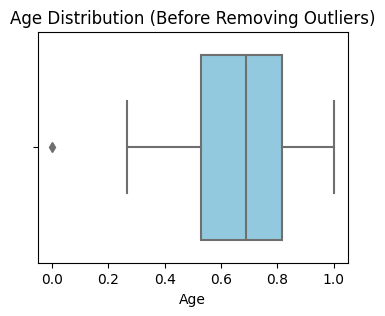

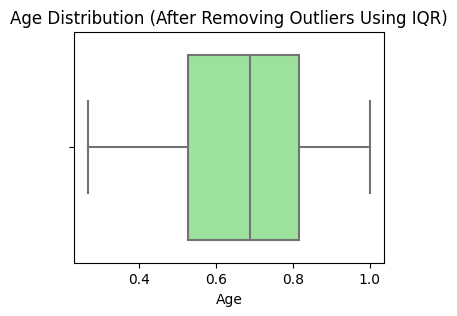

In [184]:

# Plot Age Distribution Before Removing Outliers
import seaborn as sns
import matplotlib.pyplot as plt

# Plot Age Distribution Before Removing Outliers
plt.figure(figsize=(4, 3))
sns.boxplot(x=df['age'], color='skyblue')
plt.title('Age Distribution (Before Removing Outliers)')
plt.xlabel('Age')
plt.show()

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for Age
Q1_age = df['age'].quantile(0.25)
Q3_age = df['age'].quantile(0.75)

# Calculate IQR (Interquartile Range) for Age
IQR_age = Q3_age - Q1_age

# Define lower and upper bounds for outliers in Age data
lower_bound_age = Q1_age - 1.5 * IQR_age
upper_bound_age = Q3_age + 1.5 * IQR_age

# Filter out the outliers based on the IQR method for Age
df_filtered_age_iqr = df[(df['age'] >= lower_bound_age) & (df['age'] <= upper_bound_age)]

# Plot Age Distribution After Removing Outliers Using IQR
plt.figure(figsize=(4, 3))
sns.boxplot(x=df_filtered_age_iqr['age'], color='lightgreen')
plt.title('Age Distribution (After Removing Outliers Using IQR)')
plt.xlabel('Age')
plt.show()


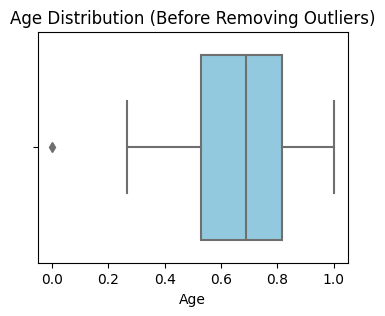

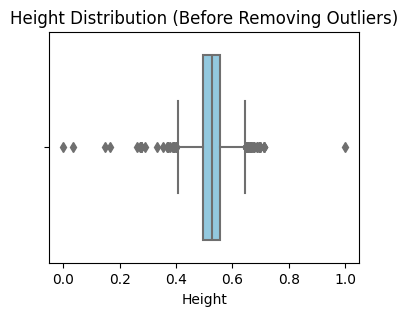

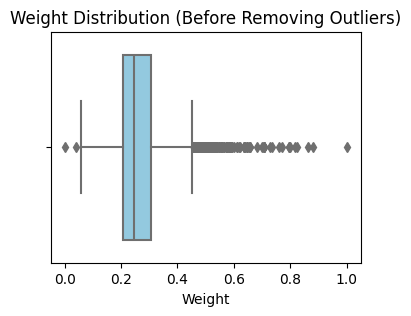

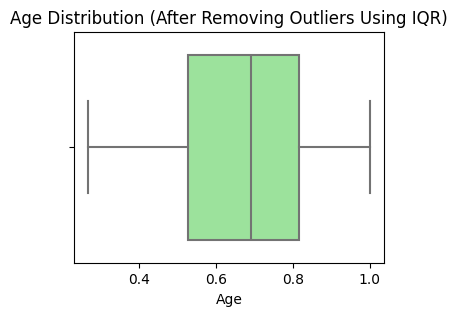

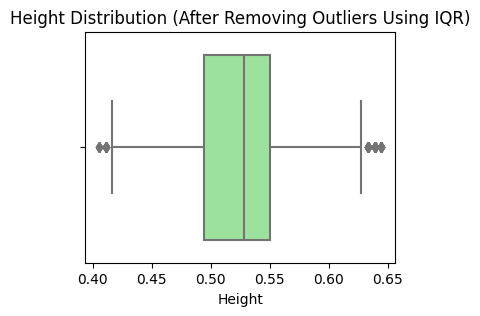

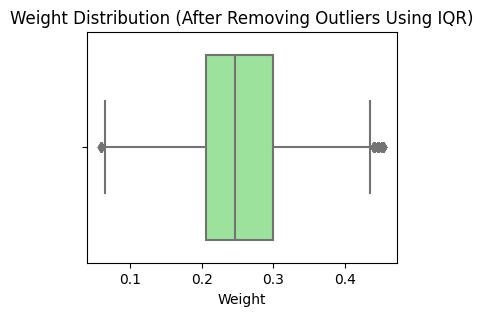

         id       age  gender    height    weight     ap_hi  ap_lo  \
0         0  0.587477       2  0.544444  0.188235  0.018103  0.008   
1         1  0.730926       1  0.477778  0.323529  0.020690  0.009   
2         2  0.623749       1  0.527778  0.200000  0.019828  0.007   
3         3  0.527283       2  0.550000  0.305882  0.021552  0.010   
4         4  0.515635       1  0.477778  0.152941  0.017241  0.006   
...     ...       ...     ...       ...       ...       ...    ...   
9994  14247  0.807770       1  0.466667  0.311765  0.021552  0.009   
9995  14249  0.746482       1  0.533333  0.205882  0.019828  0.008   
9996  14251  0.573483       1  0.500000  0.370588  0.020690  0.008   
9997  14252  0.296044       1  0.488889  0.211765  0.019828  0.009   
9998  14253  0.582395       1  0.544444  0.235294  0.022414  0.008   

      cholesterol  gluc  smoke  alco  active  cardio  
0               1     1      0     0       1       0  
1               3     1      0     0       1     

In [185]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame

# Plot Age Distribution Before Removing Outliers
plt.figure(figsize=(4, 3))
sns.boxplot(x=df['age'], color='skyblue')
plt.title('Age Distribution (Before Removing Outliers)')
plt.xlabel('Age')
plt.show()

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for Age
Q1_age = df['age'].quantile(0.25)
Q3_age = df['age'].quantile(0.75)
IQR_age = Q3_age - Q1_age
lower_bound_age = Q1_age - 1.5 * IQR_age
upper_bound_age = Q3_age + 1.5 * IQR_age

# Plot Height Distribution Before Removing Outliers
plt.figure(figsize=(4, 3))
sns.boxplot(x=df['height'], color='skyblue')
plt.title('Height Distribution (Before Removing Outliers)')
plt.xlabel('Height')
plt.show()

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for Height
Q1_height = df['height'].quantile(0.25)
Q3_height = df['height'].quantile(0.75)
IQR_height = Q3_height - Q1_height
lower_bound_height = Q1_height - 1.5 * IQR_height
upper_bound_height = Q3_height + 1.5 * IQR_height

# Plot Weight Distribution Before Removing Outliers
plt.figure(figsize=(4, 3))
sns.boxplot(x=df['weight'], color='skyblue')
plt.title('Weight Distribution (Before Removing Outliers)')
plt.xlabel('Weight')
plt.show()

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for Weight
Q1_weight = df['weight'].quantile(0.25)
Q3_weight = df['weight'].quantile(0.75)
IQR_weight = Q3_weight - Q1_weight
lower_bound_weight = Q1_weight - 1.5 * IQR_weight
upper_bound_weight = Q3_weight + 1.5 * IQR_weight

# Filter out the outliers for Age, Height, and Weight using IQR method
df_filtered = df[
    (df['age'] >= lower_bound_age) & (df['age'] <= upper_bound_age) &
    (df['height'] >= lower_bound_height) & (df['height'] <= upper_bound_height) &
    (df['weight'] >= lower_bound_weight) & (df['weight'] <= upper_bound_weight)
]

# Plot Age Distribution After Removing Outliers Using IQR
plt.figure(figsize=(4, 3))
sns.boxplot(x=df_filtered['age'], color='lightgreen')
plt.title('Age Distribution (After Removing Outliers Using IQR)')
plt.xlabel('Age')
plt.show()

# Plot Height Distribution After Removing Outliers Using IQR
plt.figure(figsize=(4, 3))
sns.boxplot(x=df_filtered['height'], color='lightgreen')
plt.title('Height Distribution (After Removing Outliers Using IQR)')
plt.xlabel('Height')
plt.show()

# Plot Weight Distribution After Removing Outliers Using IQR
plt.figure(figsize=(4, 3))
sns.boxplot(x=df_filtered['weight'], color='lightgreen')
plt.title('Weight Distribution (After Removing Outliers Using IQR)')
plt.xlabel('Weight')
plt.show()

# Display the filtered DataFrame
print(df_filtered)



In [186]:
df_filtered.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,9689.000000,9689.000000,9689.000000,9689.000000,9689.000000,9689.000000,9689.000000,9689.000000,9689.000000,9689.000000,9689.000000,9689.000000,9689.000000
mean,7117.005057,0.670425,1.342141,0.523480,0.253705,0.019635,0.009719,1.359273,1.219321,0.087625,0.053153,0.797193,0.497987
std,4127.671189,0.193976,0.474451,0.042052,0.073425,0.010226,0.020792,0.672416,0.562647,0.282764,0.224350,0.402111,0.500022
min,0.000000,0.267276,1.000000,0.405556,0.058824,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,3546.000000,0.527752,1.000000,0.494444,0.205882,0.018966,0.008000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,7090.000000,0.689884,1.000000,0.527778,0.247059,0.018966,0.008000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,10711.000000,0.816526,2.000000,0.550000,0.300000,0.020690,0.009000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,14253.000000,1.000000,2.000000,0.644444,0.452941,1.000000,1.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [187]:
df_filtered.shape

(9689, 13)

### Feature Selection Using XG Boost

<Figure size 1000x600 with 0 Axes>

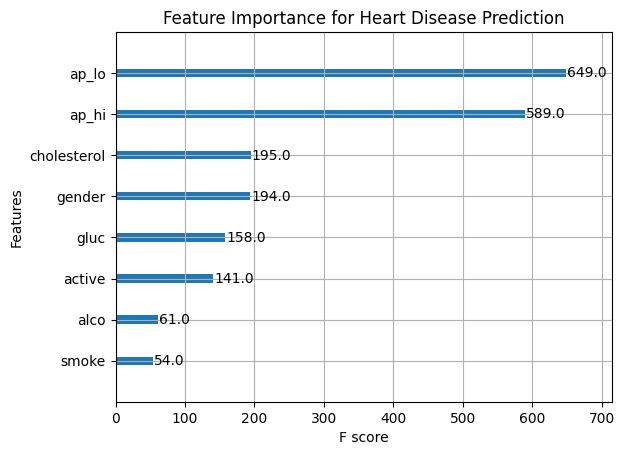

In [188]:
# Define features and target variable
Z = df_filtered[['gender', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']]  # Features as per your parameters
y = df_filtered['cardio']  # Target variable

# Train the XGBoost model
model = XGBClassifier()
model.fit(Z, y)

# Plot feature importance
plt.figure(figsize=(10, 6))
plot_importance(model, importance_type='weight', max_num_features=14, title='Feature Importance for Heart Disease Prediction', xlabel='F score', ylabel='Features')
plt.show()

We have got our most 6 importrant features :-weight,ap_hi, ap_lo, cholesterol, gluc,active

C:\Users\radhi\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


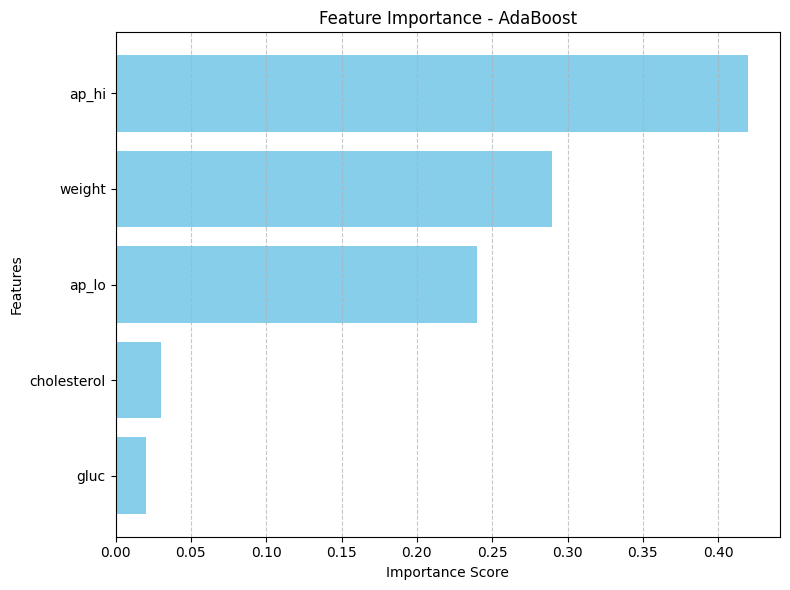

In [189]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve



X = df_filtered[['weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc']]  # Feature set
y = df_filtered['cardio']  # Target variable


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

base_estimator = DecisionTreeClassifier(max_depth=1)  # Shallow trees (decision stumps)
ada_model = AdaBoostClassifier(estimator=base_estimator, n_estimators=100, random_state=42)


ada_model.fit(X_train, y_train)


y_pred = ada_model.predict(X_test)  # Class predictions
y_pred_proba = ada_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC curve

feature_importances = ada_model.feature_importances_

# Create a DataFrame to store feature names and their importance scores
features = X_train.columns  # Feature names
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(8, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.title('Feature Importance - AdaBoost')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Model Training


### XG Boost Classifier


In [190]:
df_filtered.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,9689.000000,9689.000000,9689.000000,9689.000000,9689.000000,9689.000000,9689.000000,9689.000000,9689.000000,9689.000000,9689.000000,9689.000000,9689.000000
mean,7117.005057,0.670425,1.342141,0.523480,0.253705,0.019635,0.009719,1.359273,1.219321,0.087625,0.053153,0.797193,0.497987
std,4127.671189,0.193976,0.474451,0.042052,0.073425,0.010226,0.020792,0.672416,0.562647,0.282764,0.224350,0.402111,0.500022
min,0.000000,0.267276,1.000000,0.405556,0.058824,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,3546.000000,0.527752,1.000000,0.494444,0.205882,0.018966,0.008000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,7090.000000,0.689884,1.000000,0.527778,0.247059,0.018966,0.008000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,10711.000000,0.816526,2.000000,0.550000,0.300000,0.020690,0.009000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,14253.000000,1.000000,2.000000,0.644444,0.452941,1.000000,1.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Accuracy: 0.7282
AUC: 0.7765


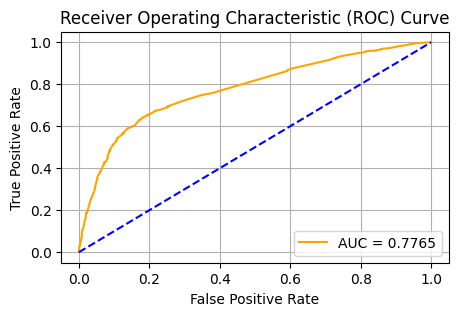

In [191]:
# Step 2: Select only the most important features
X = df_filtered[['ap_hi','ap_lo','cholesterol','active','gender'
]]
y = df_filtered['cardio']  # The target variable

# Step 3: Split the dataset (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Step 4: Initialize the XGBoost Classifier
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Step 5: Train the model
model.fit(X_train, y_train)

# Step 6: Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class (Heart Disease)

# Step 7: Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Step 8: Calculate AUC
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc:.4f}")

# Step 9: Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(5, 3))
plt.plot(fpr, tpr, color='orange', label=f'AUC = {auc:.4f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### Ada Boost Classifier


C:\Users\radhi\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.7286
AUC: 0.7796


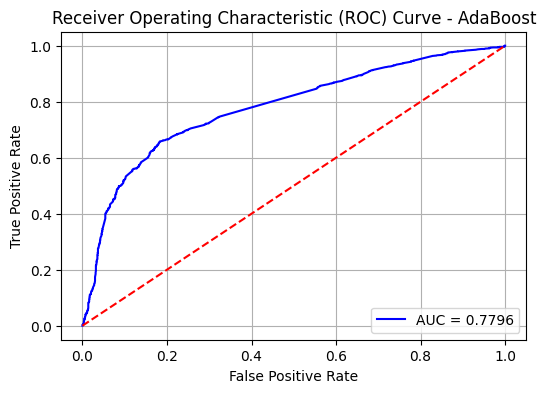

In [192]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# Step 1: Load the dataset
# Assuming 'df_filtered' is your DataFrame
# Example: df_filtered = pd.read_csv('path_to_your_file.csv')

# Step 2: Select features and target variable
X = df_filtered[['weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc']]  # Feature set
y = df_filtered['cardio']  # Target variable

# Step 3: Split the dataset (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Step 4: Initialize the AdaBoost Classifier with DecisionTreeClassifier as the base estimator
base_estimator = DecisionTreeClassifier(max_depth=1)  # Shallow trees (decision stumps)
ada_model = AdaBoostClassifier(estimator=base_estimator, n_estimators=100, random_state=42)

# Step 5: Train the AdaBoost model
ada_model.fit(X_train, y_train)

# Step 6: Make predictions on the test data
y_pred = ada_model.predict(X_test)  # Class predictions
y_pred_proba = ada_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC curve

# Step 7: Evaluate the model
# Calculate accuracy and AUC
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

# Print the evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'AUC: {auc:.4f}')

# Step 8: Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.title('Receiver Operating Characteristic (ROC) Curve - AdaBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()




### Gradient Boosting


In [193]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

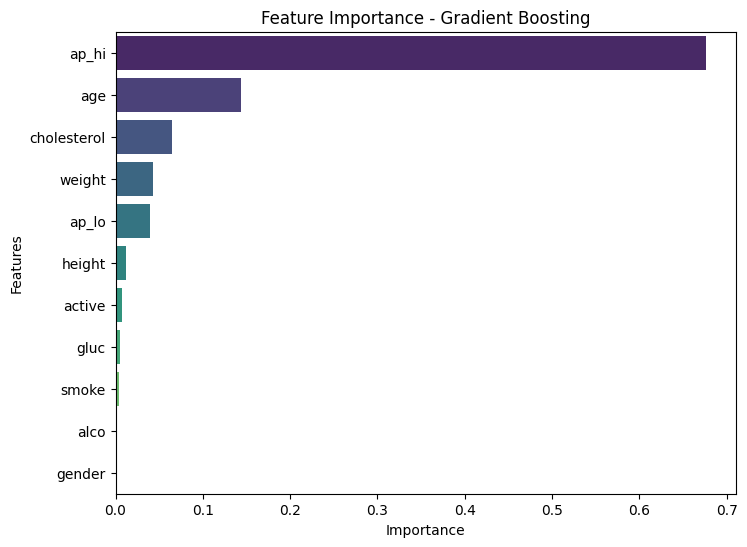

In [194]:
# Importing required libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier

# Define the features and target variable
X = df_filtered[['age','gender','height','weight','ap_hi', 'ap_lo', 'cholesterol', 'gluc','smoke','alco','active']]  # Important features
y = df_filtered['cardio']  # Target variable

# Split the dataset (70% training, 30% testing)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Initialize the GradientBoostingClassifier
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Get the feature importances
importances = gb_model.feature_importances_

# Create a DataFrame with feature names and their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance - Gradient Boosting')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

7 Important Features for Gradient Boosting Algorithm are: ap_hi, age, cholestrol, weight, ap_lo, height, active. 

Gradient Boosting Model:
Accuracy: 0.7444
AUC: 0.8086


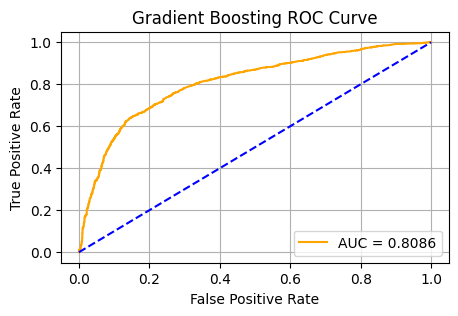

In [195]:
# Definefrom sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Define the features and target variable
X = df_filtered[['ap_hi','age','cholesterol', 'weight', 'ap_lo','height','active']]  # All features
y = df_filtered['cardio']  # Target variable

# Split the dataset (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Initialize the GradientBoostingClassifier
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions
y_pred = gb_model.predict(X_test)
y_pred_proba = gb_model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

print(f"Gradient Boosting Model:")
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC: {auc:.4f}")

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(5, 3))
plt.plot(fpr, tpr, color='orange', label=f'AUC = {auc:.4f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.title('Gradient Boosting ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### Comparing XG Boost Classsifier and Ada Boost classifier

XG Boost Classifier

In [196]:
# Load your dataset
# Assuming your dataset is already loaded and cleaned with the important features selected
# Replace df with your actual DataFrame
# df = pd.read_csv('your_dataset.csv')

Z = df_filtered[['ap_hi','ap_lo','cholesterol','active','gender']]
y = df_filtered['cardio']  # The target variable


# Split the dataset into training (70%) and testing (30%)
Z_train, Z_test, y_train, y_test = train_test_split(Z, y, test_size=0.3, random_state=42, stratify=y)

# Initialize models

xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.05, max_depth=4, random_state=42, use_label_encoder=False)


# Train the XGBoost model
xgb_model.fit(Z_train, y_train)
y_pred_xgb = xgb_model.predict(Z_test)



print("\nClassification Report for XGBoost:")
print(classification_report(y_test, y_pred_xgb))



Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.69      0.83      0.75      1459
           1       0.79      0.62      0.69      1448

    accuracy                           0.73      2907
   macro avg       0.74      0.73      0.72      2907
weighted avg       0.74      0.73      0.72      2907



Ada Boost Classifier

In [197]:
X = df_filtered[['weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc']]  # Feature set
y = df_filtered['cardio']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
# Initialize models
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
# Train the AdaBoost model
ada_model.fit(X_train, y_train)
y_pred_ada = ada_model.predict(X_test)
# Print classification report for both models
print("Classification Report for AdaBoost:")
print(classification_report(y_test, y_pred_ada))


C:\Users\radhi\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Classification Report for AdaBoost:
              precision    recall  f1-score   support

           0       0.70      0.81      0.75      1459
           1       0.77      0.64      0.70      1448

    accuracy                           0.73      2907
   macro avg       0.73      0.73      0.72      2907
weighted avg       0.73      0.73      0.72      2907



Gradient Boosting

In [198]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Assuming your dataset is already loaded and cleaned with the important features selected
# Replace df with your actual DataFrame
# df = pd.read_csv('your_dataset.csv')
w = df_filtered[['ap_hi','age','cholesterol', 'weight', 'ap_lo','height','active']] 
y = df_filtered['cardio']  # Target variable

# Split the dataset into training (70%) and testing (30%)
w_train, w_test, y_train, y_test = train_test_split(w, y, test_size=0.3, random_state=42, stratify=y)

# Initialize Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the Gradient Boosting model
gb_model.fit(w_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(w_test)

# Print the classification report
print("\nClassification Report for Gradient Boosting:")
print(classification_report(y_test, y_pred_gb))



Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.70      0.79      0.74      1459
           1       0.76      0.67      0.71      1448

    accuracy                           0.73      2907
   macro avg       0.73      0.73      0.73      2907
weighted avg       0.73      0.73      0.73      2907



In [199]:

# Compute AUC for Ada
roc_auc_ada = roc_auc_score(y_test, ada_model.predict_proba(X_test)[:, 1])
print(f"AdaBoost ROC AUC: {roc_auc_ada}")





AdaBoost ROC AUC: 0.776793828740642


In [200]:
#Complete  AUC for XG Boost
roc_auc_xgb = roc_auc_score(y_test, xgb_model.predict_proba(Z_test)[:, 1])
print(f"XGBoost ROC AUC: {roc_auc_xgb}")

XGBoost ROC AUC: 0.7778155400467286


In [201]:
from sklearn.metrics import roc_auc_score

# Compute AUC for Gradient Boosting
roc_auc_gb = roc_auc_score(y_test, gb_model.predict_proba(w_test)[:, 1])
print(f"Gradient Boosting ROC AUC: {roc_auc_gb}")


Gradient Boosting ROC AUC: 0.7973213034735817


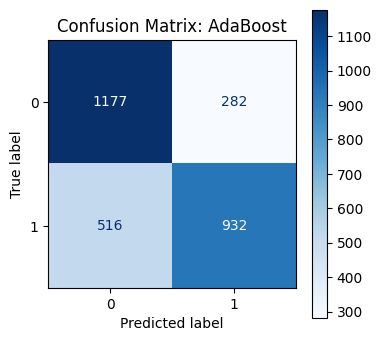

In [202]:
# Plot confusion matrix for AdaBoost
plt.figure(figsize=(4,4))
conf_matrix_ada = confusion_matrix(y_test, y_pred_ada)
disp_ada = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_ada)
disp_ada.plot(cmap='Blues', ax=plt.gca())
plt.title('Confusion Matrix: AdaBoost')
plt.show()


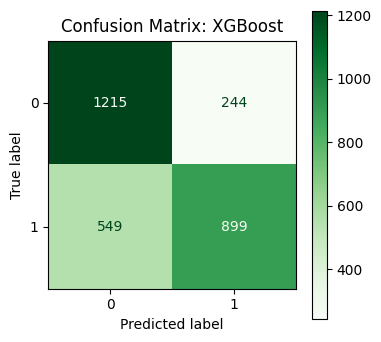

In [203]:

plt.figure(figsize=(4,4))
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_xgb)
disp_xgb.plot(cmap='Greens', ax=plt.gca())
plt.title('Confusion Matrix: XGBoost')
plt.show()



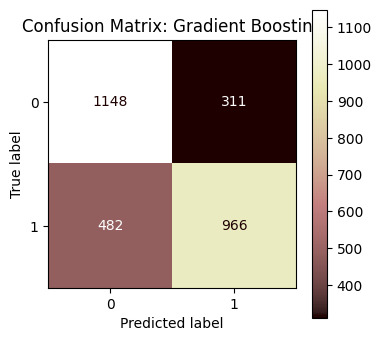

In [204]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Plot confusion matrix for Gradient Boosting
plt.figure(figsize=(4, 4))
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
disp_gb = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_gb)
disp_gb.plot(cmap='pink', ax=plt.gca())
plt.title('Confusion Matrix: Gradient Boosting')
plt.show()
